Imports

In [102]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from joblib import dump, load
from sklearn import svm

df = pd.read_csv('data/twitter_processed.csv')
y = df['status']
X = df['text']

td  = TfidfVectorizer()
X = td.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [103]:
model_file = 'models/tfidf_svm'
clf = load(model_file)

# clf = svm.SVC()
# clf.fit(X_train, y_train)

In [104]:
y_pred = clf.predict(X_test)

In [105]:
classification_report = classification_report(y_test, y_pred)

print()
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print()
print(f'Classification Report:')
print(f'======================================================')
print(f'{classification_report}')
print(f'======================================================')


Accuracy: 0.9745257452574526

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1328
           1       0.98      0.93      0.95       517

    accuracy                           0.97      1845
   macro avg       0.98      0.96      0.97      1845
weighted avg       0.97      0.97      0.97      1845



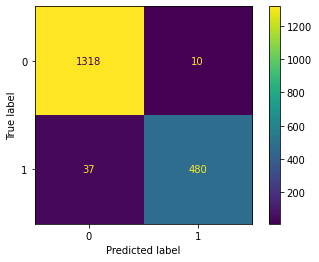

In [106]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)